In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import torch
from tqdm import tqdm

import numpy as np

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [ ]:
samples = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
yellow = samples[0][samples[1] == 0]
purple = samples[0][samples[1] == 1]

yellow_labels = np.zeros(len(yellow))
purple_labels = np.ones(len(purple))

labels = np.append(yellow_labels, purple_labels)
inputs = np.concatenate((yellow, purple), axis=0)

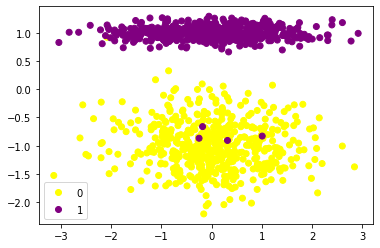

In [ ]:
colors = ListedColormap(['yellow', 'purple'])
scatter = plt.scatter(x=inputs[:, 0], y=inputs[:, 1], c=labels, cmap=colors)
plt.legend(*scatter.legend_elements())

In [ ]:
X_train, X_test, y_train,  y_test = train_test_split(inputs, labels, test_size=0.2)

X_train, X_test = torch.Tensor(X_train), torch.Tensor(X_test)
y_train, y_test = torch.Tensor(y_train), torch.Tensor(y_test)

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
      super().__init__()
      self.linear = torch.nn.Linear(input_dim, output_dim)
         
    def forward(self, x):
      outputs = torch.sigmoid(self.linear(x))
      return outputs

In [ ]:
input_dim = 2  
output_dim = 1 
model = LogisticRegression(input_dim, output_dim)

In [ ]:
criterion = torch.nn.MSELoss() # loss

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
epochs = 200000

for epoch in tqdm(range(epochs), desc='Training Epochs'):
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), y_train) # [n, 1] -> [n]
    loss.backward() # gradient

    optimizer.step() # weights

Training Epochs: 100%|██████████| 200000/200000 [01:06<00:00, 3001.53it/s]


In [ ]:
from sklearn.metrics import f1_score   

prediction = (model(X_test) > 0.5).long()
f1_score(y_test, prediction > 0.5)

0.989247311827957

In [ ]:
model(torch.Tensor([0, 1]))

tensor([0.9817], grad_fn=<SigmoidBackward0>)